## 6 - Which country has produced the most successful tennis players? 

In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

event_files = glob('../data/raw/*/event_[0-9]*.parquet')
home_files = glob('../data/raw/*/home_team_[0-9]*.parquet')
away_files = glob('../data/raw/*/away_team_[0-9]*.parquet')

In [2]:
# Load events data
df_events = pd.concat([pd.read_parquet(f, columns=['match_id', 'winner_code']) for f in event_files], ignore_index=True)
df_events.head()

,match_id,winner_code
0,12075272,2
1,12076290,1
2,12077080,1
3,12077399,2
4,12076858,1


In [3]:
# Load home team data
df_home = pd.concat([pd.read_parquet(f, columns=['match_id', 'country']) for f in home_files], ignore_index=True)
df_home = df_home.rename(columns={'country': 'home_player_country'})

# Load away team data
df_away = pd.concat([pd.read_parquet(f, columns=['match_id', 'country']) for f in away_files], ignore_index=True)
df_away = df_away.rename(columns={'country': 'away_player_country'})

In [4]:
# Merge all data together
dfs = df_events.merge(df_home, on='match_id').merge(df_away, on='match_id')
dfs.head()

,match_id,winner_code,home_player_country,away_player_country
0,12075272,2,Italy,Argentina
1,12075272,2,Italy,Argentina
2,12075272,2,Italy,Argentina
3,12075272,2,Italy,Argentina
4,12077080,1,Japan,Poland


In [5]:
# Create a column for the winning player Nationality (Country)
dfs['winer_player_country'] = dfs.apply(lambda x: x['home_player_country'] if x['winner_code'] == 1 else x['away_player_country'], axis=1)

# Drop duplicate match_id rows && NaN
dfs = dfs.drop_duplicates(subset='match_id').dropna()
dfs.head()

,match_id,winner_code,home_player_country,away_player_country,winer_player_country
0,12075272,2,Italy,Argentina,Argentina
4,12077080,1,Japan,Poland,Japan
12,12077281,2,Germany,Ireland,Ireland
21,12075955,1,Japan,Mexico,Japan
25,12049571,2,Chile,Argentina,Argentina


In [6]:
# Calculate win count per player
country_win_counts = dfs['winer_player_country'].value_counts().reset_index()
country_win_counts.head()

,winer_player_country,count
0,France,847
1,USA,771
2,Italy,667
3,Russia,492
4,Germany,424


In [7]:
# Get the top winner
top_winner_country = country_win_counts.iloc[0]

print(f"\nThe counntry that produced the most succesfull tennis players: \"{top_winner_country['winer_player_country']}\"")
print(f"{top_winner_country['winer_player_country']} has a total number of \"{top_winner_country['count']}\" wins in two monthes altogether")


The counntry that produced the most succesfull tennis players: "France"
France has a total number of "847" wins in two monthes altogether


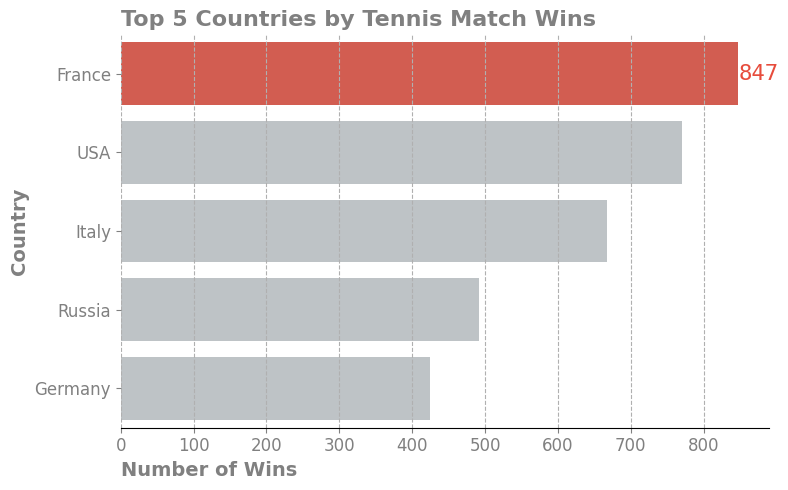

In [8]:
# Visualization
top_5 = country_win_counts.sort_values('count', ascending=False).head(5).reset_index(drop=True)
top_5['highlight'] = ['Top'] + ['Other'] * (len(top_5) - 1)
palette = {'Top': '#e74c3c', 'Other': '#bdc3c7'}

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(
    data=top_5,
    y='winer_player_country',
    x='count',
    hue='highlight',
    palette=palette,
    legend=False,
)

# Hide spines
for spine in ['right', 'left', 'top']:
    ax.spines[spine].set_visible(False)

# Add count label for top country only
ax.text(
    top_5.at[0, 'count'] + 1, 0,
    f"{top_5.at[0, 'count']:,}",
    va='center', ha='left',
    fontsize=16, fontfamily='monospace',
    color=palette['Top']
)

# Titles and labels
ax.set_title("Top 5 Countries by Tennis Match Wins", loc="left", weight="bold", color="gray", fontsize=16)
ax.set_xlabel("Number of Wins", weight="bold", color="gray", loc="left", fontsize=14)
ax.set_ylabel("Country", weight="bold", color="gray", fontsize=14)

# Ticks and grid
ax.tick_params(axis="x", colors="gray", labelsize="12")
ax.tick_params(axis="y", colors="gray", labelsize="12")
ax.grid(axis="x", linestyle="dashed")

plt.tight_layout()
plt.savefig('../data/output/figures/img6.png')
plt.show()